<a href="https://colab.research.google.com/github/UBC-Astrophysics/QEDSurface/blob/master/IXPEObsSim/test_ixpe_file_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducing the `ixpe_file_model` module

## Requirements

* [IXPEObsSim](https://bitbucket.org/ixpesw/ixpeobssim/src/master/)
* Python
* [PyXSPEC](https://heasarc.gsfc.nasa.gov/docs/xanadu/xspec/python/html/index.html)
* [QEDSurface](https://github.com/UBC-Astrophysics/QEDSurface)

Documentation for IXPEObsSim:

https://cocalc.coolpulsars.org/636f9d55-17fa-4cc0-bb9c-ec4e36690581/raw/Neutron-Star-Atmosphere/ixpesw-ixpeobssim-572fa0092131/docs/_build/singlehtml/index.html#document-index

Similar documentation for XIMPOL:

https://buildmedia.readthedocs.org/media/pdf/ximpol/stable/ximpol.pdf

xwiki:

http://xwiki.ssdc.asi.it/xwiki/bin/view/Main/

Bitbucket:

https://bitbucket.org/ixpesw/ixpeobssim/src/master/


## Setting up the ixpe_file_model module


1.   You can find the [ixpe_file_model.py](https://github.com/UBC-Astrophysics/QEDSurface/blob/master/IXPEObsSim/config/ixpe_file_model.py) file in the [config](https://github.com/UBC-Astrophysics/QEDSurface/tree/master/IXPEObsSim/config) directory in the [QEDSurface](https://github.com/UBC-Astrophysics/QEDSurface) repository.
2.   You should make a copy the ixpe_file_model module to create a configuration file for your particular source.  
3. All of the key parameters are defined located at the top of the module.
4. At a minimum, you must define the following parametrers:
* Position of the source: `ra`, `dec`.
* Spin frequency, frequency first and second derivative: `nu0`, `nudot`, `nuddot`.
* File with spectral and polarization data: filename.
* Magnetic dipole geometry: `alpha` and `beta.
5. There are a few optional parameters:
* You can renormalize the phase-averaged flux before absorption to have a fixed value or to follow a given spectrum with the `normflux` parameter.  `normflux` can be a floating point number, an array of values corresponding to the energies listed in `filename`, a function or filename.
* You can apply interstellar absorption with the `NH` parameter.  `NH` can be a floating point number for the hydrogen column density or a string with a floating point number and filename: e.g. `"1e22;tbabs.dat"`. 
* You can also normalize the phase-average flux after absorption with the finalnorm parameter.
* As final step, the module assumes that your spectrum is in the units of counts/s/cm<sup>2</sup>/keV.  If it is in erg/s/cm<sup>2</sup>/keV, set `intensity_energy_units=True`, and it will perform the needed conversion.
6. The various files should be in the [config/ascii](https://github.com/UBC-Astrophysics/QEDSurface/tree/master/IXPEObsSim/config/ascii) directory.
7. The file that contains the spectral and polarization information (`filename`) must contain the following information with a header row at the top.
* Angle between the line of sight and the magnetic axis in radians: `Phi[rad]`
* Energy of radiation: `Energy[keV]`
* Intensity or flux: `I`
* Polarization with respect to the magnetic axis projected into the sky: `Q/I`

This file can contain other information, and the row and columns can be in any order.  The values of the angle and the energy must form a rectangular grid.
8. The file that contains the spectral renormalization information (`normflux`) must contain the following information with a header row at the top.
* Energy of radiation: `Energy[keV]`
* Flux: `I`
9. The file that contains the absoprtion cross section as a function of energy as defined in `NH` must contain the following information with a header row at the top.
* Energy of radiation in keV: `Energy`
* Cross section times <i>E</i><sup>3</sup> in units of 10<sup>-24</sup> cm<sup>2</sup> keV<sup>3</sup>: `sigma`.





 

## Components within the ixpe_file_model module

You can access all of the a forementioned parameters from outside the module as `ixpe_file_model.ra` for example.  There are many additional components defined with energy `E` in keV, inclination `i` in radians, phase `t` from 0 to 1:

* `energy_spectrum_inclination(E,i)`
* `ratio_inclination(E,i)`
* ` pol_deg(E, t, ra=None, dec=None)`
* `pol_ang(E, t, ra=None, dec=None)` in radians
* `rawspec(E,t)`: unabsorbed spectrum before renormalization
* `spec(E,t)`: absorbed counts spectrum after renormalization


# Simulation Steps

## Load libraries

In [1]:
import os     
import numpy
import matplotlib.pyplot as plt
from ixpeobssim import IXPEOBSSIM_CONFIG, IXPEOBSSIM_DATA, IXPEOBSSIM_DOC
import ixpeobssim.core.pipeline as pipeline
from ixpeobssim.utils.logging_ import logger

## Load the model

In [2]:
import ixpeobssim.config.ixpe_file_model as magnetar

## Display the model

Double_Blackbody.txt


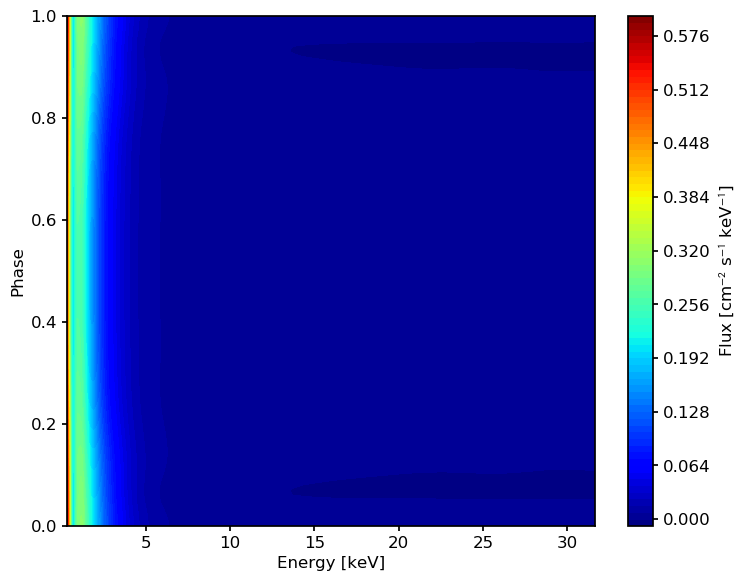

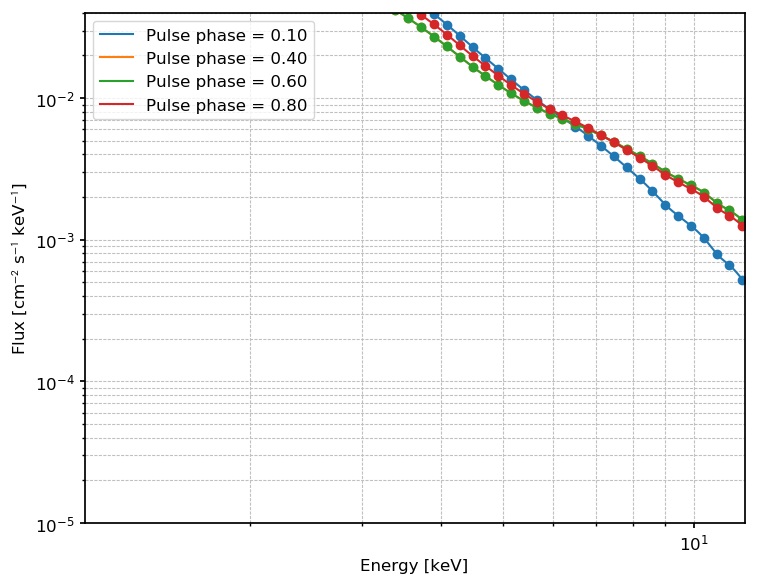

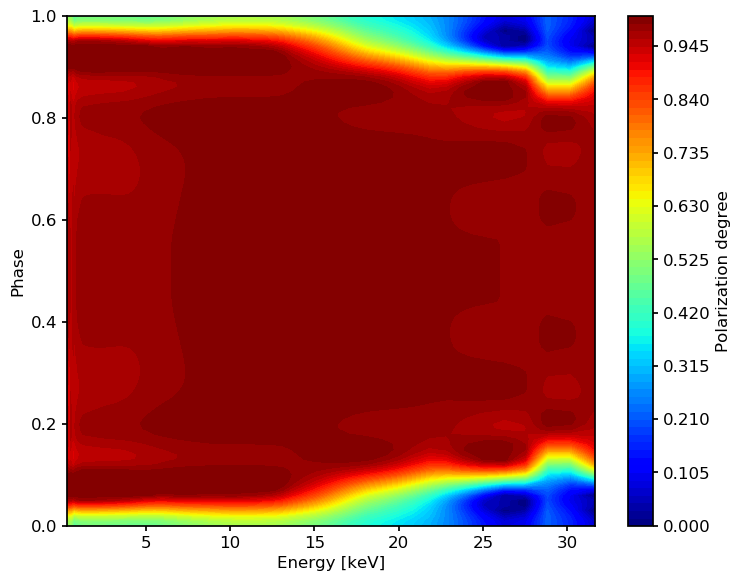

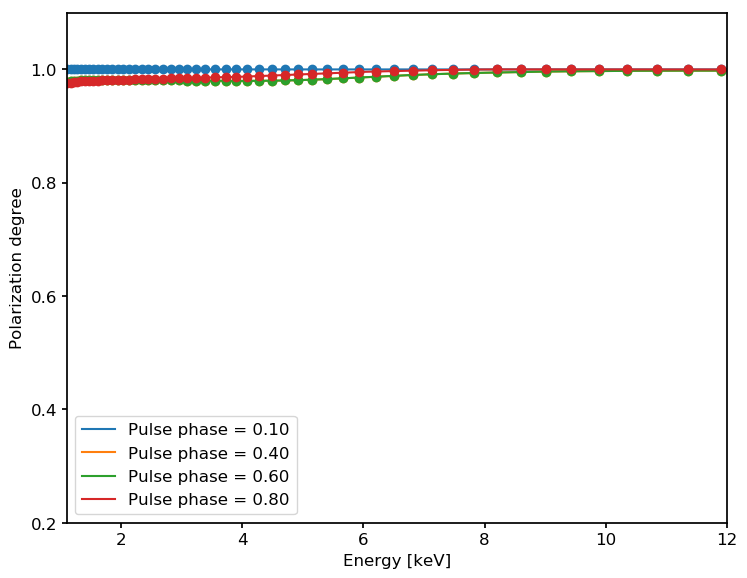

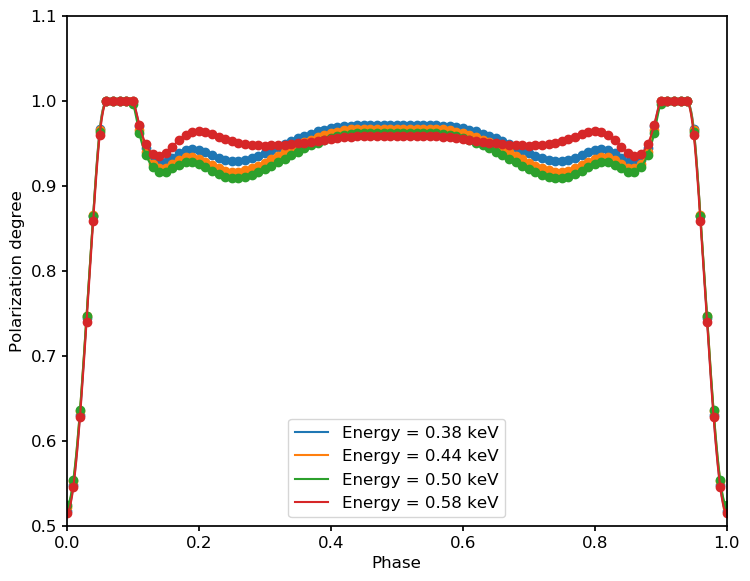

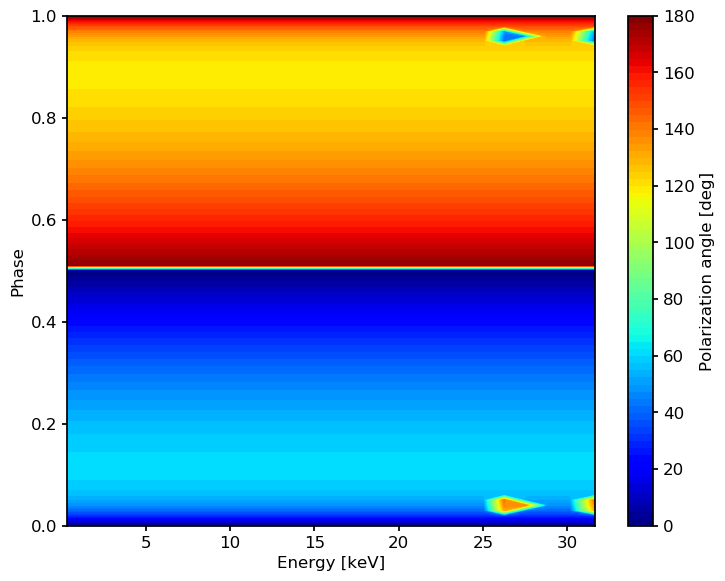

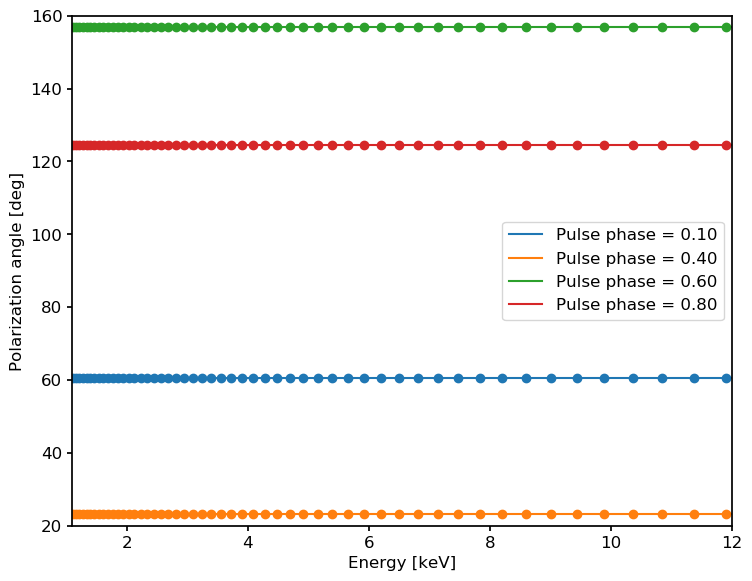

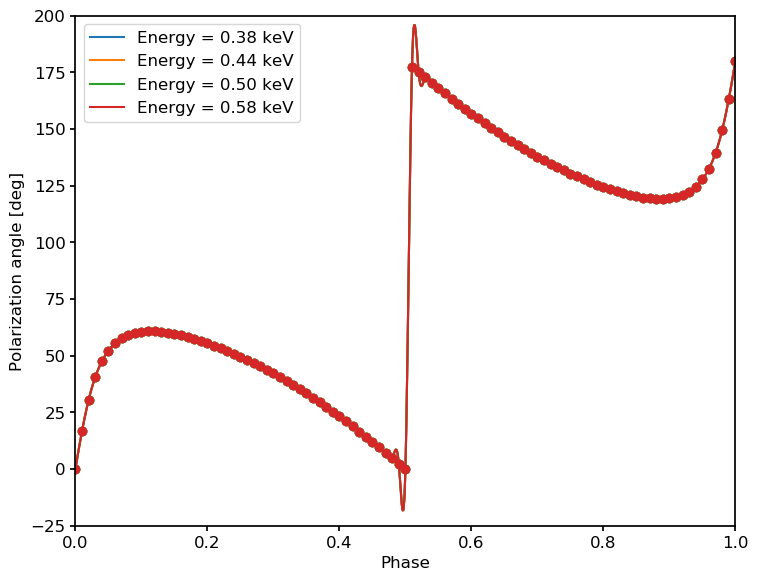

In [3]:
print(magnetar.filename)
magnetar.display()

## Phase-Averaged Spectrum

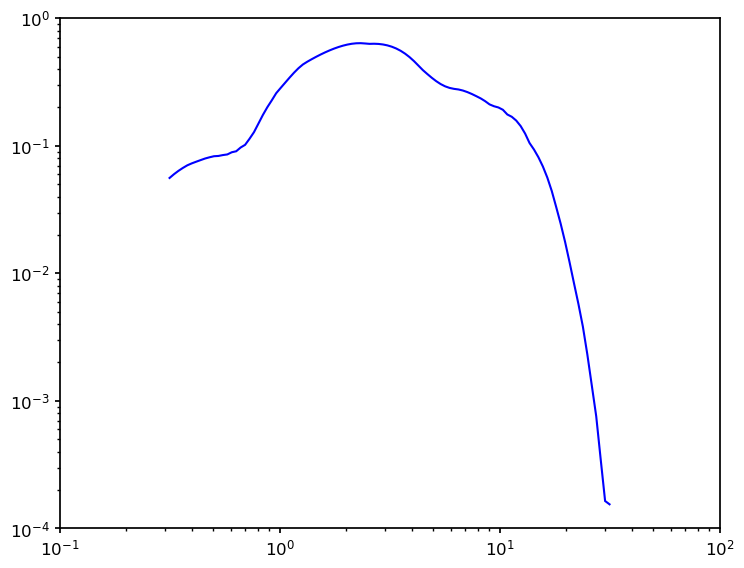

In [4]:
mfl=numpy.mean(magnetar.flux,axis=-1)
plt.loglog(magnetar.enerlist,magnetar.enerlist**2*mfl,'b')


## Phase-Averaged Q/I

Using the instantaneous projection of the magnetic moment into the sky as the basis


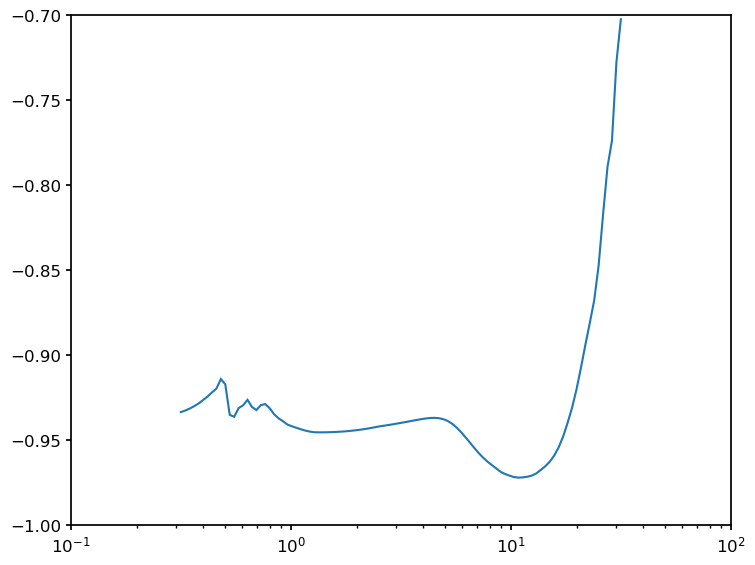

In [5]:
_t=numpy.linspace(0,1,101)
_tt,_ee=numpy.meshgrid(_t,magnetar.enerlist)
qfl=numpy.mean(magnetar.flux*magnetar.ratio_inclination(_ee,magnetar.inclination(_tt)),axis=-1)
plt.semilogx(magnetar.enerlist,qfl/mfl)


## Configure the simulation.

In [6]:
head,cfile=os.path.split(magnetar.__file__)
CFG_FILE = os.path.join(IXPEOBSSIM_CONFIG, cfile)
modulename=os.path.splitext(cfile)[0]
OUT_FILE_PATH_BASE = os.path.join(IXPEOBSSIM_DATA, modulename)
EVT_FILE_PATH = '%s.fits' % OUT_FILE_PATH_BASE
SIM_DURATION = 100000.
OUTPUT_FOLDER = os.path.join(IXPEOBSSIM_DOC, 'figures', 'showcase')


## Clean up

Remove output files from a previous run.

In [7]:
os.system('rm {}*'.format(OUT_FILE_PATH_BASE))

0

## Perform the simulation

In [8]:
EVT_FILE_PATH = pipeline.xpobssim(configfile=CFG_FILE, duration=SIM_DURATION)

>>> Setting output file base name to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model...


>>> Setting up the source model...


>>> ROI centered at (26.5934, 61.7509):
- xPeriodicPointSource "4U 0142+61" (id = 0)
    Galactic column density: 0.000e+00 cm^{-2}
    Redshift: 0.000
    Unabsorbed flux @ t = 0: 1.311e-09 erg/cm2/s (65.56 mcrab)
    Position: RA = 26.5933625 deg, Dec = 61.7508861111 deg
    Ephemeris: t0 = 0.0 s, nu0 = 0.11509211554 Hz, nudot = -2.6783806e-14 Hz/s, nuddot = 0.0 Hz/s^2


>>> Done [t0 + 0.181 s].


>>> Setting the random seed to 2567139420...


>>> Loading the instrument response functions...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu1stdcutv003.arf...



    Welcome to ixpeobssim 8.2.2 (built on Thu, 27 Feb 2020 11:28:33 +0100).

    Copyright (C) 2015--2019, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu1stdcutv003.arf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  SPECRESP      1 BinTableHDU     35   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1stdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.062931', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu1vignstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.062931', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu1vignstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  VIGNETTING    1 BinTableHDU     27   1R x 4C   [275E, 275E, 18E, 4950E]   


>>> Response file ixpemcdu1vignstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.245255', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu1stdcutv003.rmf...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.245255', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu1stdcutv003.rmf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  MATRIX        1 BinTableHDU     40   275R x 6C   [E, E, I, I, I, 275E]   
  2  EBOUNDS       1 BinTableHDU     35   275R x 3C   [I, E, E]   


>>> Response file ixpemcdu1stdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.256145', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu1psfstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.256145', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu1psfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   ()      
  1  PSF           1 BinTableHDU     30   1R x 5C   [E, E, E, E, E]   


>>> Response file ixpemcdu1psfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.525812', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.525812', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu1modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu1modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Done [t0 + 0.975 s].


>>> Generating the photon list...


>>> Generating event list for "4U 0142+61"...


>>> Phase grid for sampling the light curve: [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.8585

{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.472266', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU1', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


>>> About to generate 636258 events...


>>> Applying the dithering pattern to the event list...


>>> A = 1.600 arcmin, pa = 907.000 s, px = 101.000 s, py = 449.000 s


>>> Applying vignetting to the event list...


>>> Done, 636258/636258 (100.00%) events remaining.


>>> Running time for apply_vignetting(): 0.122 s


>>> Applying GPD fiducial area cut to the event list...


>>> Done, 636258/636258 (100.00%) events remaining.


>>> Running time for apply_fiducial_area(): 0.020 s


>>> Applying dead time (0.00108) to the event list...


>>> Done, 631943/636258 (99.32%) events remaining, deadtime correction 0.993.


>>> Running time for apply_dead_time(): 0.266 s


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 xLvl2PrimaryHDU     40   ()      
  1  EVENTS        1 xBinTableHDUEvents    101   631943R x 17C   ['J', 'J', 'J', 'D', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'I', 'I', 'E', 'E', 'E', 'E']   
  2  MONTE_CARLO    1 xBinTableHDUMonteCarlo     47   631943R x 9C   ['I', 'E', 'J', 'E', 'E', 'E', 'I', 'I', 'E']   
  3  GTI           1 xBinTableHDUGTI     29   1R x 2C   ['D', 'D']   
  4  ROITABLE      1 xBinTableHDURoiTable     16   1R x 2C   ['I', '20A']   


>>> Event list written to /projects/636f9d55-17fa-4cc0-bb9c-ec4e36690581/ixpeobssimdata/ixpe_file_model_du1.fits...


>>> Done for detector unit # 1 [t0 + 8.964 s].


>>> Setting the random seed to 2567139421...


>>> Loading the instrument response functions...


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu2stdcutv003.arf...


Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/arf/ixpemcdu2stdcutv003.arf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  SPECRESP      1 BinTableHDU     35   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2stdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.567382', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu2vignstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.567382', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'arf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/vign/ixpemcdu2vignstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  VIGNETTING    1 BinTableHDU     27   1R x 4C   [275E, 275E, 18E, 4950E]   


>>> Response file ixpemcdu2vignstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.579084', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu2stdcutv003.rmf...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.579084', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'vign', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/cpf/rmf/ixpemcdu2stdcutv003.rmf
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  MATRIX        1 BinTableHDU     40   275R x 6C   [E, E, I, I, I, 275E]   
  2  EBOUNDS       1 BinTableHDU     35   275R x 3C   [I, E, E]   


>>> Response file ixpemcdu2stdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.588949', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu2psfstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.588949', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'rmf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/psf/ixpemcdu2psfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   ()      
  1  PSF           1 BinTableHDU     30   1R x 5C   [E, E, E, E, E]   


>>> Response file ixpemcdu2psfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.854799', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Reading instrument response data from /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits...


{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.854799', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'psf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}
Filename: /projects/anaconda3-2019.03/lib/python3.7/site-packages/ixpeobssim-8.2.2-py3.7.egg/ixpeobssim/caldb/bcf/gpd/ixpemcdu2modfstdcutv003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  MODFRESP      1 BinTableHDU     29   275R x 3C   [E, E, E]   


>>> Response file ixpemcdu2modfstdcutv003 {'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'} loaded.


>>> Done [t0 + 9.826 s].


>>> Generating the photon list...


>>> Generating event list for "4U 0142+61"...


>>> Phase grid for sampling the light curve: [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.8585

{'SIMPLE': True, 'BITPIX': 8, 'NAXIS': 0, 'EXTEND': True, 'CREATOR': 'mkirf.py', 'CREAT_ID': '7.1.0', 'DATE': '2019-11-27T08:59:03.802783', 'TELESCOP': 'IXPE', 'INSTRUME': 'GPD', 'DETNAM': 'DU2', 'IRFTYPE': 'modf', 'COMMENT': 'Standard IRFs, default for simulation and analysis'}


>>> About to generate 636260 events...


In [0]:
EVT_FILE_PATH

# Basic Analysis

## Generate a count map and plot it

In [0]:

from ixpeobssim.evt.binning import xBinnedMap
 
cmap_file_list=pipeline.xpbin(*EVT_FILE_PATH, algorithm='CMAP')
count_map = xBinnedMap.from_file_list(cmap_file_list)
count_map.plot()


## Generate a light curve

In [0]:
from ixpeobssim.evt.binning import xBinnedLightCurve

lc_file_list=pipeline.xpbin(*EVT_FILE_PATH, algorithm='LC')
count_lc = xBinnedLightCurve.from_file_list(lc_file_list)
count_lc.plot()

## Generate a spectrum

In [0]:
from ixpeobssim.evt.binning import xBinnedCountSpectrum

pha1_file_path = pipeline.xpbin(*EVT_FILE_PATH, algorithm='PHA1')
pha1_data = xBinnedCountSpectrum.from_file_list(pha1_file_path)
pha1_data.plot()


# Pulse Folding

## Calculate phases

In [0]:
folded_EVT_FILE_PATH=pipeline.xptimetophase(*EVT_FILE_PATH, configfile=CFG_FILE,suffix='folded')

## Plot the pulse profile

In [0]:
from ixpeobssim.evt.binning import xBinnedPulseProfile

prof_file_path = pipeline.xpbin(*folded_EVT_FILE_PATH, algorithm='PP')
prof_data = xBinnedPulseProfile.from_file_list(prof_file_path)
prof_data.plot()


# Look at polarization    

## Divide events in phase bins

In [0]:
from ixpeobssim.evt.binning import pairwise_enum
PHASE_BINNING = numpy.concatenate((numpy.linspace(0,0.2,11),numpy.linspace(0.3,0.7,11),numpy.linspace(0.8,1.0,11)))

for i, (min_, max_) in pairwise_enum(PHASE_BINNING):
        pipeline.xpselect(*folded_EVT_FILE_PATH, phasemin=min_, phasemax=max_,
                          suffix=pipeline.suffix('phase', i),overwrite=True)



## Generate MCUBE files

This contain the Stokes parameters for each energy and phase bin.

In [0]:
ENERGY_BINNING = numpy.array([2., 4., 8.])


for i, (min_, max_) in pairwise_enum(PHASE_BINNING):
    file_list = ['%s_phase%04d.fits'% (s[:-5],i)   for s in folded_EVT_FILE_PATH]
    pipeline.xpbin(*file_list, algorithm='MCUBE', ebinalg='LIST',ebinning=ENERGY_BINNING,overwrite=True)



## Load the MCUBE data into Python

In [0]:
from ixpeobssim.evt.binning import xEventBinningBase, xBinnedModulationCube  

phase = numpy.linspace(0., 1., 100)
phase_bins = xEventBinningBase.bin_centers(PHASE_BINNING)
shape = (len(ENERGY_BINNING) - 1, len(PHASE_BINNING) - 1)
pol_deg = numpy.zeros(shape)
pol_deg_err = numpy.zeros(shape)
pol_ang = numpy.zeros(shape)
pol_ang_err = numpy.zeros(shape)
emean = numpy.zeros(shape)
for i, (min_, max_) in pairwise_enum(PHASE_BINNING):
    file_list = ['%s_phase%04d_mcube.fits'% (s[:-5],i)   for s in folded_EVT_FILE_PATH]

    mcube = xBinnedModulationCube.from_file_list(file_list)
    pol_deg[:,i] = mcube.pol_deg
    pol_deg_err[:,i] = mcube.pol_deg_err
    pol_ang[:,i] = mcube.pol_ang
    pol_ang_err[:,i] = mcube.pol_ang_err
    emean[:,i] = mcube.energy_mean


## Plot the polarization degree

In [0]:
for i, (min_, max_) in pairwise_enum(ENERGY_BINNING):
    plt.errorbar(phase_bins, pol_deg[i,:], pol_deg_err[i,:], fmt='o',
                         label='%g - %g' % (min_, max_))
    energy = numpy.nanmean(emean[i,:])
    plt.plot(phase, magnetar.pol_deg(energy, phase),label='%2.1f' % energy        )
plt.legend()

## Plot the polarization angle

In [0]:
for i, (min_, max_) in pairwise_enum(ENERGY_BINNING):
    plt.errorbar(phase_bins, numpy.mod(pol_ang[i,:],180), pol_ang_err[i,:], fmt='o',
                     label='%g - %g' % (min_, max_))
    energy = numpy.nanmean(emean[i,:])
    plt.plot(phase, numpy.degrees(magnetar.pol_ang(energy, phase) )    )
plt.legend()

# Look at phase-averaged polarization

## Create an MCUBE with finer energy bins

In [0]:
ENERGY_BINNING2 = numpy.array([2., 3., 4., 6., 8.])

pipeline.xpbin(*folded_EVT_FILE_PATH, algorithm='MCUBE', ebinalg='LIST',ebinning=ENERGY_BINNING2,overwrite=True)

## Load the MCUBE data into Python

In [0]:
file_list = ['%s_mcube.fits'% (s[:-5],)   for s in folded_EVT_FILE_PATH]

mcube2 = xBinnedModulationCube.from_file_list(file_list)
pol_deg2 = mcube2.pol_deg
pol_deg2_err= mcube2.pol_deg_err
pol_ang2 = mcube2.pol_ang
pol_ang2_err = mcube2.pol_ang_err
emean2 = mcube2.energy_mean

## Plot angle vs. energy

In [0]:
plt.errorbar(emean2, numpy.mod(pol_ang2,180), pol_ang2_err, fmt='o') 

## Plot polarization degree vs energy

In [0]:
plt.errorbar(emean2, pol_deg2, pol_deg2_err, fmt='o')

# Polarization Relative to Model

Let's calculate the angle between the electric vector measured for each photon and the model value of the polarization at the phase of arrival of the photon

## Load fits libary

In [0]:
from astropy.io import fits

## Rotate the polarization direction of each photon

Each photon has a value of `PHI`, the polarization angle relative to North and the corresponding `U` and `Q` values.  We replace `PHI` with the difference between the observed angle and an angle from the model at the `PHASE` of arrival of the photon.  We also replace `U` and `Q`.

The FITS file does not contain the energy explicitly but one could translate `PHA` values to energy to rotate relative to the model at a particular energy.

In [0]:
rotated_EVT_FILE_PATH=[]
for f in folded_EVT_FILE_PATH:
    fnew=f.replace('folded','rotated')
    with fits.open(f) as hdul:
        hdul[1].data['PHI']=hdul[1].data['PHI']-magnetar.pol_ang(2.4, hdul[1].data['PHASE'])
        hdul[1].data['PHE_U']= 2 * numpy.sin(2 * hdul[1].data['PHI'])  
        hdul[1].data['PHE_Q']= 2 * numpy.cos(2 * hdul[1].data['PHI'])  
        hdul.writeto(fnew)
        rotated_EVT_FILE_PATH.append(fnew)
print(rotated_EVT_FILE_PATH)

## Divide rotated events in phase bins

In [0]:
from ixpeobssim.evt.binning import pairwise_enum
PHASE_BINNING = numpy.concatenate((numpy.linspace(0,0.2,11),numpy.linspace(0.3,0.7,11),numpy.linspace(0.8,1.0,11)))

for i, (min_, max_) in pairwise_enum(PHASE_BINNING):
        pipeline.xpselect(*rotated_EVT_FILE_PATH, phasemin=min_, phasemax=max_,
                          suffix=pipeline.suffix('phase', i),overwrite=True)

## Generate MCUBE Files

In [0]:
ENERGY_BINNING = numpy.array([2., 4., 8.])


for i, (min_, max_) in pairwise_enum(PHASE_BINNING):
    file_list = ['%s_phase%04d.fits'% (s[:-5],i)   for s in rotated_EVT_FILE_PATH]
    pipeline.xpbin(*file_list, algorithm='MCUBE', ebinalg='LIST',ebinning=ENERGY_BINNING,overwrite=True)



## Load the rotated MCUBE data into Python

In [0]:
from ixpeobssim.evt.binning import xEventBinningBase, xBinnedModulationCube  

phase = numpy.linspace(0., 1., 100)
phase_bins = xEventBinningBase.bin_centers(PHASE_BINNING)
shape = (len(ENERGY_BINNING) - 1, len(PHASE_BINNING) - 1)
pol_deg = numpy.zeros(shape)
pol_deg_err = numpy.zeros(shape)
pol_ang = numpy.zeros(shape)
pol_ang_err = numpy.zeros(shape)
emean = numpy.zeros(shape)
for i, (min_, max_) in pairwise_enum(PHASE_BINNING):
    file_list = ['%s_phase%04d_mcube.fits'% (s[:-5],i)   for s in rotated_EVT_FILE_PATH]

    mcube = xBinnedModulationCube.from_file_list(file_list)
    pol_deg[:,i] = mcube.pol_deg
    pol_deg_err[:,i] = mcube.pol_deg_err
    pol_ang[:,i] = mcube.pol_ang
    pol_ang_err[:,i] = mcube.pol_ang_err
    emean[:,i] = mcube.energy_mean


## Plot the polarization degree against phase

Ideally this will lie closer to the model than before, because the angle doesn't change within the phase bins.

In [0]:
for i, (min_, max_) in pairwise_enum(ENERGY_BINNING):
    plt.errorbar(phase_bins, pol_deg[i,:], pol_deg_err[i,:], fmt='o',
                         label='%g - %g' % (min_, max_))
    energy = numpy.nanmean(emean[i,:])
    print(numpy.nanmean(pol_deg[i,:]),numpy.nanmean(pol_deg_err[i,:]**2/len(pol_deg_err[i,:]))**0.5)

    plt.plot(phase, magnetar.pol_deg(energy, phase),label='%2.1f' % energy        )
plt.legend()


## Plot the polarization angle vs phase

The result should be zero or 180 degrees because we are comparing with the model.

In [0]:
for i, (min_, max_) in pairwise_enum(ENERGY_BINNING):
    plt.errorbar(phase_bins, numpy.mod(pol_ang[i,:],180), pol_ang_err[i,:], fmt='o',
                     label='%g - %g' % (min_, max_))
    energy = numpy.nanmean(emean[i,:])
    plt.plot(phase, numpy.degrees(magnetar.pol_ang(energy, phase) )    )
plt.legend()

# Phase-Averaged Polarization (in the Rotating Frame)

These values will be more useful now because the polarization doesn't get smeared over the period.

## Create the new MCUBE with finer energy bins


In [0]:
ENERGY_BINNING2 = numpy.array([2., 3., 4., 6., 8.])

pipeline.xpbin(*rotated_EVT_FILE_PATH, algorithm='MCUBE', ebinalg='LIST',ebinning=ENERGY_BINNING2,overwrite=True)

## Load the MCUBE data into Python

In [0]:
file_list = ['%s_mcube.fits'% (s[:-5],)   for s in rotated_EVT_FILE_PATH]

mcube2 = xBinnedModulationCube.from_file_list(file_list)
pol_deg2 = mcube2.pol_deg
pol_deg2_err= mcube2.pol_deg_err
pol_ang2 = mcube2.pol_ang
pol_ang2_err = mcube2.pol_ang_err
emean2 = mcube2.energy_mean

## Plot the angle vs energy

In [0]:
plt.errorbar(emean2, numpy.mod(pol_ang2,180), pol_ang2_err, fmt='o') 

## Plot the degree vs energy

In [0]:
plt.errorbar(emean2, pol_deg2, pol_deg2_err, fmt='o')

## Q/I as a function of energy

In [0]:
plt.errorbar(emean2, -numpy.cos(numpy.radians(2*pol_ang2))*pol_deg2, pol_deg2_err, fmt='o')
plt.plot(magnetar.enerlist,qfl/mfl)
w=emean2[-1]-emean2[0]
plt.xlim(emean2[0]-0.1*w,emean2[-1]+0.1*w)

plt.xlabel('Energy [keV]')
plt.ylabel('Q/I')